# Spatial Autocorrelation: Air Quality (PM2.5)

`AIRQUALTY_` - average density of fine particulate matter in micrograms per cubic meter (PM2.5)

In [1]:
pip install pysal==2.0.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install esda

     |████████████████████████████████| 122kB 4.6MB/s eta 0:00:01
  Created wheel for esda: filename=esda-2.4.3-cp37-none-any.whl size=122764 sha256=bd0768372cbf78e8dec7cc4d3e7ed06e76bb3436440dabb9f7628a2402560155
  Stored in directory: /home/nelsonce/.cache/pip/wheels/7c/1b/e6/d1169be315fa840f9250ccefd1b6e5605b3690f279dd489765
Successfully built esda
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install splot   #this might take some time the first time

     |████████████████████████████████| 11.2MB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 39.3MB/s eta 0:00:01
     |████████████████████████████████| 40kB 29.6MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 56.5MB/s eta 0:00:01
     |████████████████████████████████| 296kB 61.2MB/s eta 0:00:01
     |████████████████████████████████| 972kB 49.7MB/s eta 0:00:01
     |████████████████████████████████| 50.5MB 55.3MB/s eta 0:00:01
     |████████████████████████████████| 327kB 57.3MB/s eta 0:00:01
     |████████████████████████████████| 2.4MB 53.2MB/s eta 0:00:01
     |████████████████████████████████| 133kB 61.7MB/s eta 0:00:01


  Created wheel for pillow: filename=Pillow-9.5.0-cp37-cp37m-linux_x86_64.whl size=1382170 sha256=47e904c35159f212a06449057726f5b323773e392a28007b3192535022e9dd8c
  Stored in directory: /home/nelsonce/.cache/pip/wheels/ca/4d/df/d168a9bc75cabf441026762d25f8a03a3cce26d81101a94590
  Created wheel for numba: filename=numba-0.56.4-cp37-cp37m-linux_x86_64.whl size=3201891 sha256=ad54e9383a3916a85dd41c6c29ab46aaf240e722cbc9b494e247d04e8bcb7b7b
  Stored in directory: /home/nelsonce/.cache/pip/wheels/bb/18/0f/12a5a372d26bdde2a71d08bf4987fe8c8c8a8d80655e1afb0e
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-30jfkzyv/llvmlite/setup.py'"'"'; __file__='"'"'/tmp/pip-install-30jfkzyv/llvmlite/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wh

In [4]:
%pip install -U plotly

     |████████████████████████████████| 15.6MB 4.1MB/s eta 0:00:01
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Graphics
import matplotlib.pyplot as plt
import seaborn as sbn
from pysal.viz import splot
#from splot.esda import plot_moran

# Analysis
import geopandas as gpd  # Spatial data manipulation
import pandas as pd
import numpy as np
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

In [6]:
%matplotlib inline
import plotly.graph_objects as go
import plotly.figure_factory as ff
#https://plotly.com/python/builtin-colorscales/

from matplotlib import colors

### Load all data with geospatial (geometry) component included

In [7]:
df = gpd.read_file('fipsmerge_geo.shp')

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

df.head(2)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_Ad,ARTHRITIS_,BINGE_AdjP,BPHIGH_Adj,BPMED_AdjP,CANCER_Adj,CASTHMA_Ad,CERVICAL_A,CHD_AdjPre,CHECKUP_Ad,CHOLSCREEN,COLON_SCRE,COPD_AdjPr,COREM_AdjP,COREW_AdjP,CSMOKING_A,DENTAL_Adj,DEPRESSION,DIABETES_A,GHLTH_AdjP,HIGHCHOL_A,KIDNEY_Adj,LPA_AdjPre,MAMMOUSE_A,MHLTH_AdjP,OBESITY_Ad,PHLTH_AdjP,SLEEP_AdjP,STROKE_Adj,TEETHLOST_,HEARING_Ad,VISION_Adj,COGNITION_,MOBILITY_A,SELFCARE_A,INDEPLIVE_,DISABILITY,COUNTY_NAM,SchoolSegr,ChildcareC,Dentists,HighSchool,SomeColleg,Unemployme,ChildrenIn,IncomeIneq,ChildrenSi,AirPolluti,DrinkingWa,DrivingAlo,LongCommut,Disconnect,GenderPayG,MedianHHIn,ChildrenFr,Residentia,Homeowners,SevereHous,BroadbandA,Population,AgeBelow18,Age65Older,Black,AmericanIn,Asian,NativeHawa,Hispanic,White,NotProfici,Female,PrematureD,PoorFairHe,PoorPhysic,PoorMental,LowBirthwe,AdultSmoki,AdultObesi,FoodEnviro,PhysicalIn,AccesstoEx,ExcessiveD,AlcoholImp,STI,TeenBirths,Uninsured,PrimaryCar,Preventabl,Mammograph,FluVaccina,SocialAsso,InjuryDeat,AirPollu_1,HHighHousi,HHwOvercro,HHwLackKit,LifeExpect,PrematureA,ChildMorta,InfantMort,FrequentPh,DiabetesPr,HIVPrevale,FoodInsecu,DrugOverdo,UninsuredA,UninsuredC,HighScho_1,ChildrenEl,Resident_1,ChildCar_1,Homicides,Suicides,FirearmFat,MotorVehic,JuvenileAr,FormalJuve,InformalJu,Rural,AIRQUALTY_,geometry
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.79440,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348,"POLYGON ((-86.82067 32.34731, -86.81446 32.370..."
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.30071,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533,"POLYGON ((-87.97309 31.16482, -87.93710 31.173..."


In [8]:
df.STATE_ABBR.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [9]:
#checking for missing values
df['AIRQUALTY_'].isna().sum()

8

In [10]:
# drop only rows that are missing data for airquality
df = df.dropna(subset=['AIRQUALTY_'])

### Create table for vaiable of interest: Air Quality

In [11]:
# Index table on variable of interest "Air Quality PM2.5 Mean"
db = df.set_index("AIRQUALTY_", drop=False)
db.crs

{'init': 'epsg:4326'}

In [12]:
# Reprojecting from Decimal Degree to a planimetric projection (Spherical Mercator) 
# for enabling distance measures needed for spaital weights.

In [13]:
db2 = db.to_crs(epsg=3857)

Here I am choosing contiguity/adjacency spatial weight, specifically **Queen contiguity**. I think because the data are counties, that adjacency/contguity spatial weights works well for this polygon data. Although, it may not present much of a difference here, I am choosing Queen over Rook as to include as neighboors those polygons that only share one or more vertices.

In [14]:
# spaital weights
w = weights.contiguity.Queen.from_dataframe(db2)

#standardize matrix
w.transform = 'R'

#finding the log transform of the data to get the "y"
y = db2['AIRQUALTY_']

('WARNING: ', 1181, ' is an island (no neighbors)')
('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1829, ' is an island (no neighbors)')
('WARNING: ', 2938, ' is an island (no neighbors)')


/opt/conda/lib/python3.7/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 4 disconnected observations 
  Island ids: 1181, 1187, 1829, 2938
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [15]:
# Finding the spatial lag and adding column ‘lag’
db2['lag'] = weights.lag_spatial(w,y)

Calculating a **global measure** of spatial autocorrelation - **Moran's I** 

In [16]:
#Moran's I and p-value
mi = esda.Moran(db2['lag'], w)
mi

In [17]:
mi.I

0.8907021013705083

In [18]:
mi.p_sim

0.001

`AIRQUALTY_` has a moderate/modest positive spatial autocorrelation (.89). This means that there is a clustered pattern as opposed to a random or dispersed pattern. The p-value is .001, so we reject the null - the pattern reached significance. 

In [19]:
# Let's take a look at the Moran's I plot. Remember to look at the 4 quarters.
# finishing changing the code to match current variables

db2['lag'] = weights.spatial_lag.lag_spatial(w, db2['AIRQUALTY_'])

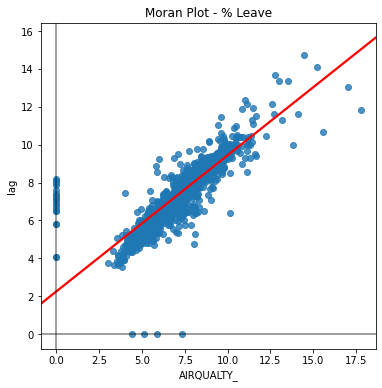

In [20]:
# moran_scatterplot(mi);
f, ax = plt.subplots(1, figsize=(6, 6))
sbn.regplot(
    x="AIRQUALTY_",
    y="lag",
    ci=None,
    data=db2,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

Looking more locally for spatial autocorrelation using the Local Indicator of Spatial Autocorrelation (**LISA**).

In [21]:
lisa = esda.Moran_Local(db2['lag'], w)

/opt/conda/lib/python3.7/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Adding columns to our data for both significance and what quadrant the counties fell in.

In [22]:
# Break counties into significant or not
db2['significant'] = lisa.p_sim < 0.05
db2['significant'] = db2['significant'].astype('int').astype("str")


# Tag what quadrant they belong to
db2['quad'] = lisa.q

In [23]:
#reset index
db2.reset_index(drop=True, inplace=True)

In [24]:
# Pick only significant counties - assign '0' to non-significant

spots = []

for x in range(len(db2.significant)):
    for obs in db2['significant'][x]:
        if obs == "0":
            spots.append(0)
        if obs == '1':
            spots.append(db2['quad'][x])

db2['spots'] = spots

# check the unique values
db2.spots.unique()

array([0, 1, 3, 4, 2])

In [25]:
#Mapping from value to name (as dictionary)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}

In [26]:
# Create column in `db` with labels for each polygon
db2["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db2.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
db2["labels"].value_counts()

Non-Significant    1738
HH                  765
LL                  592
HL                    4
LH                    1
Name: labels, dtype: int64

In [27]:
#Getting Total USCountyMap for background

USCountyMap = df[['FIPS','STATE_NAME','geometry']]
USCountyMap = USCountyMap.to_crs({'init':'epsg:3857'})

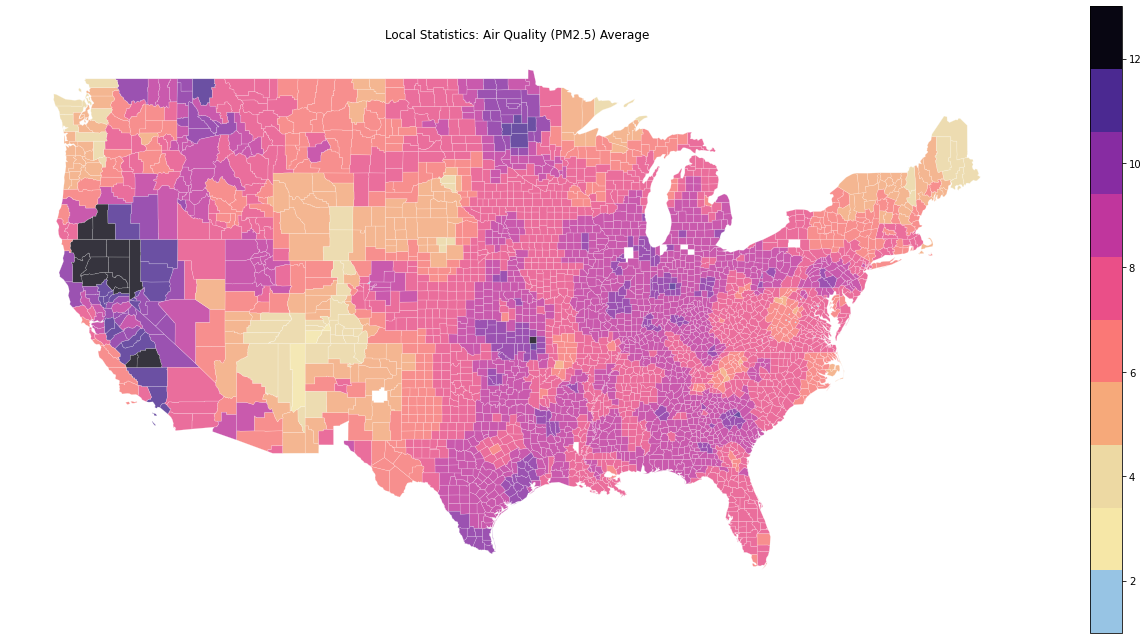

In [28]:
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize

# Define the color scheme with proper hex color values
aqcolors = ['#97C4E4', '#F6E7A7', '#EDD9A3', '#F6A97A', '#FA7876', 
            '#EA4F88', '#C0369D', '#872CA2', '#4B2991', '#080612']

# Create the ListedColormap
aq_cmap = ListedColormap(aqcolors)

# Set up figure and axes
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
# Make the axes accessible with single indexing


# Subplot 1 #
# Choropleth of local statistics


# Plot gray county base
base = USCountyMap.plot(color='#EDECED', 
                      edgecolor='white',
ax=ax)

#Plot choropleth of local statistics
db2.plot(column='AIRQUALTY_', 
         cmap= aq_cmap,      #'viridis_r',
         norm = Normalize(vmin=1, vmax=13),
         edgecolor='white',
         linewidth=0.2,
         alpha=0.8,
         legend = True,
         legend_kwds={'format': '%.0f'},
ax=base

)

# Figure styling #
# Set title to each subplot
ax.set_axis_off()
ax.set_title('Local Statistics: Air Quality (PM2.5) Average'
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

#Save figure
#plt.savefig("us_aqPM2.5")
    
# Display the figure
plt.show()

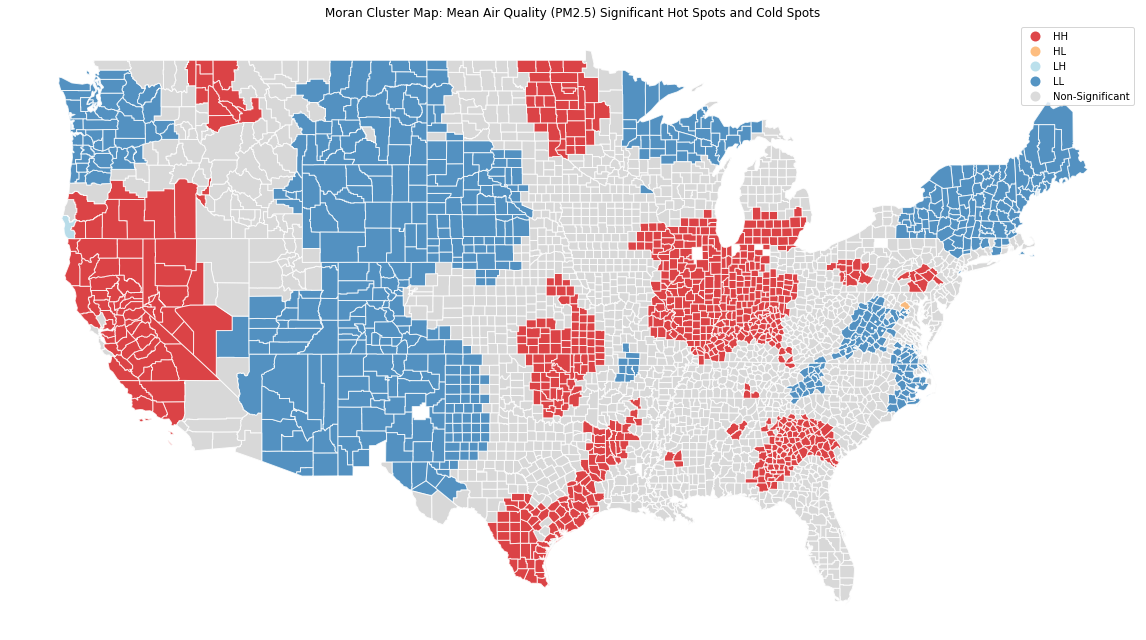

In [29]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Set up figure and axes
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
# Make the axes accessible with single indexing


# Subplot 2 #
# Quadrant categories

# Plot gray county base
base = USCountyMap.plot(color='#EDECED', 
                      edgecolor='white',
ax=ax)

# Plot Quandrant colors 
db2.plot(column='labels', 
         cmap=ListedColormap(['#D7191C','#FDAE61', '#ABD9E9','#2C7BB6','#D3D3D3']), 
         edgecolor='white', 
         alpha=0.8,
         legend = True, 
ax=base
)

# Figure styling #
# Set title to each subplot
ax.set_axis_off()
ax.set_title(
    'Moran Cluster Map: Mean Air Quality (PM2.5) Significant Hot Spots and Cold Spots'
    )
#ax.get_legend().remove()
# Tight layout to minimise in-betwee white space
f.tight_layout()

    
# Display the figure
plt.show()

In [30]:
db2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Columns: 129 entries, FIPS to labels
dtypes: float64(117), geometry(1), int64(4), object(7)
memory usage: 3.1+ MB


In [31]:
pd.set_option("max_columns", None)
db2.head(2)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_Ad,ARTHRITIS_,BINGE_AdjP,BPHIGH_Adj,BPMED_AdjP,CANCER_Adj,CASTHMA_Ad,CERVICAL_A,CHD_AdjPre,CHECKUP_Ad,CHOLSCREEN,COLON_SCRE,COPD_AdjPr,COREM_AdjP,COREW_AdjP,CSMOKING_A,DENTAL_Adj,DEPRESSION,DIABETES_A,GHLTH_AdjP,HIGHCHOL_A,KIDNEY_Adj,LPA_AdjPre,MAMMOUSE_A,MHLTH_AdjP,OBESITY_Ad,PHLTH_AdjP,SLEEP_AdjP,STROKE_Adj,TEETHLOST_,HEARING_Ad,VISION_Adj,COGNITION_,MOBILITY_A,SELFCARE_A,INDEPLIVE_,DISABILITY,COUNTY_NAM,SchoolSegr,ChildcareC,Dentists,HighSchool,SomeColleg,Unemployme,ChildrenIn,IncomeIneq,ChildrenSi,AirPolluti,DrinkingWa,DrivingAlo,LongCommut,Disconnect,GenderPayG,MedianHHIn,ChildrenFr,Residentia,Homeowners,SevereHous,BroadbandA,Population,AgeBelow18,Age65Older,Black,AmericanIn,Asian,NativeHawa,Hispanic,White,NotProfici,Female,PrematureD,PoorFairHe,PoorPhysic,PoorMental,LowBirthwe,AdultSmoki,AdultObesi,FoodEnviro,PhysicalIn,AccesstoEx,ExcessiveD,AlcoholImp,STI,TeenBirths,Uninsured,PrimaryCar,Preventabl,Mammograph,FluVaccina,SocialAsso,InjuryDeat,AirPollu_1,HHighHousi,HHwOvercro,HHwLackKit,LifeExpect,PrematureA,ChildMorta,InfantMort,FrequentPh,DiabetesPr,HIVPrevale,FoodInsecu,DrugOverdo,UninsuredA,UninsuredC,HighScho_1,ChildrenEl,Resident_1,ChildCar_1,Homicides,Suicides,FirearmFat,MotorVehic,JuvenileAr,FormalJuve,InformalJu,Rural,AIRQUALTY_,geometry,lag,significant,quad,spots,labels
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.79440,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348,"POLYGON ((-9664832.763 3808987.252, -9664141.4...",8.498664,0,1,0,Non-Significant
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.30071,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533,"POLYGON ((-9793119.561 3654173.030, -9789113.3...",8.384320,0,1,0,Non-Significant


## Prepping data for POWERBI data story

In [32]:
# Convert GeoPandas DataFrame to regular pandas DataFrame
db2_e = pd.DataFrame(db2)


#selecting data 
aq_db2_e = db2_e[['FIPS','STATE_NAME','STATE_ABBR','COUNTY','COUNTY_NAM','AIRQUALTY_','labels']]

# renaming columns
aq_db2_e.columns = ['FIPS','STATE_NAME','STATE_ABBR','COUNTY','COUNTY_NAME','AirQualityMean','AirQualityClusters']
aq_db2_e.head(12)

,FIPS,STATE_NAME,STATE_ABBR,COUNTY,COUNTY_NAME,AirQualityMean,AirQualityClusters
0,01001,Alabama,AL,Autauga,Autauga County,8.535348,Non-Significant
1,01003,Alabama,AL,Baldwin,Baldwin County,8.263533,Non-Significant
2,01005,Alabama,AL,Barbour,Barbour County,8.978495,HH
3,01007,Alabama,AL,Bibb,Bibb County,8.875465,Non-Significant
4,01009,Alabama,AL,Blount,Blount County,9.062862,Non-Significant
5,01011,Alabama,AL,Bullock,Bullock County,8.809776,Non-Significant
6,01013,Alabama,AL,Butler,Butler County,8.419869,Non-Significant
7,01015,Alabama,AL,Calhoun,Calhoun County,8.372677,Non-Significant
8,01017,Alabama,AL,Chambers,Chambers County,8.564352,Non-Significant
9,01019,Alabama,AL,Cherokee,Cherokee County,8.275254,Non-Significant


In [33]:
#Exporting data for PowerBI data story
aq_db2_e.to_csv('aq_cluster.csv',index=False)